## Paso 1: Carga del conjunto de datos, importa y limpia los datos

#### 1.1: Cargar el dataset

Cargamos el archivo CSV desde un enlace externo y mostramos las primeras filas para entender su estructura.

In [66]:
# Your code here
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [67]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
dataframe = pd.read_csv(url, sep=",")
guardar = "/workspaces/Tutorial-de-Proyecto-de-Regresion-Lineal/data/raw/medical_insurance_cost.csv"
dataframe.to_csv(guardar, index=False)
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 1.2: Exploración inicial de los datos

Inspeccionamos el tipo de datos, valores faltantes y estadísticas básicas del dataset.

In [68]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [69]:
dataframe.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [70]:
dataframe.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### 1.3: Codificar variables categóricas.

Utilizamos `pd.get_dummies()` para convertir variables categóricas (`sex`, `smoker`, `region`) en variables numéricas.

In [71]:
dataframe = pd.get_dummies(dataframe, drop_first=True)
dataframe.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


#### 1.4: Separar variables predictoras y variable objetivo

La variable que queremos predecir es `charges`. Las demás serán nuestras variables predictoras.

In [72]:
X = dataframe.drop('charges', axis=1)
y = dataframe['charges']
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


#### 1.5: Dividir los datos en entrenamiento y prueba

Usamos 80% de los datos para entrenamiento y 20% para prueba con `train_test_split`.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (1070, 8)
X_test shape: (268, 8)


#### 1.6: Entrenar el modelo de regresión lineal

Creamos una instancia del modelo `LinearRegression` y lo entrenamos con los datos de entrenamiento.

In [74]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### 1.7: Hacer predicciones

Usamos el modelo para predecir los valores de `charges` en el set de prueba.

In [75]:
y_pred = model.predict(X_test)

#### 1.8: Evaluar el modelo

Calculamos el error cuadrático medio (MSE) y el puntaje R² para medir el rendimiento del modelo.

In [76]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 33596915.85
R² Score: 0.7836


#### 1.9: Interpretar coeficientes del modelo

Mostramos los coeficientes para entender cómo influyen las variables en el coste del seguro.

In [77]:
pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])

,Coeficiente
age,256.975706
bmi,337.092552
children,425.278784
sex_male,-18.591692
smoker_yes,23651.128856
region_northwest,-370.677326
region_southeast,-657.864297
region_southwest,-809.799354


#### 1.10 Visualizar predicciones vs valores reales

Graficamos los valores reales de `charges` frente a las predicciones para ver qué tan bien se ajusta el modelo.

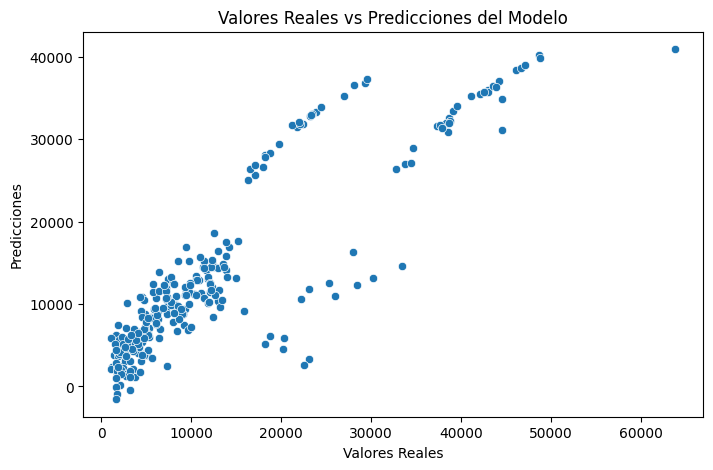

In [78]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones del Modelo")
plt.show()

## Paso 2: EDA completo (Análisis Exploratorio de Datos)

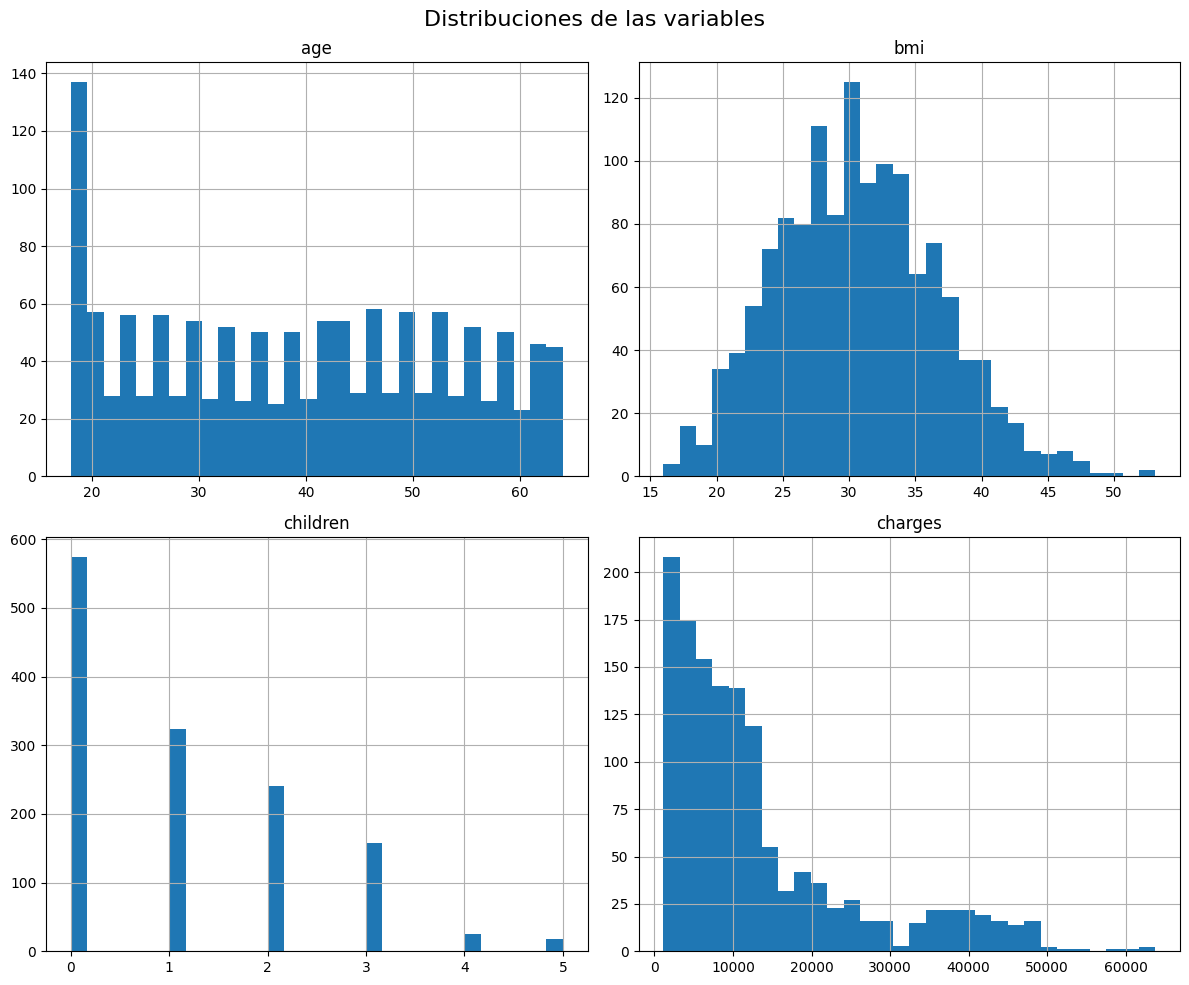

In [79]:
# Revisar distribución de cada variable numérica
dataframe.hist(bins=30, figsize=(12,10))
plt.suptitle("Distribuciones de las variables", fontsize=16)
plt.tight_layout()
plt.show()



Age: Hay una concentracion de jovenes a partir de los 18 bastante alta que, a medida que la edad aumenta, cada vez hay menos personas. Si hay muchas personas jóvenes o adultas, el modelo podría aprender que la edad está relacionada con el costo del seguro.

BMi: Valores altos pueden indicar obesidad, lo cual aumenta el riesgo médico → mayor charges. Lo saludable esta entre 20 - 25 y vemos que la concentracion se dispara de entre los 23 hasta el punto alto, siendo 30, teniendo un arco bajista hasta 34 y ya de ahi va bajando poco a poco. Asi que la obesidad puede ser una señal de donde sacar mas dinero 

Children: Tener más hijos podría influir ligeramente en el seguro (mayor responsabilidad), pero generalmente tiene poca correlación.

Charges: Altamente sesgada a la derecha (muchos pagan poco, pocos pagan muchísimo). Valores extremos altos podrían deberse a personas mayores o fumadoras con condiciones médicas.

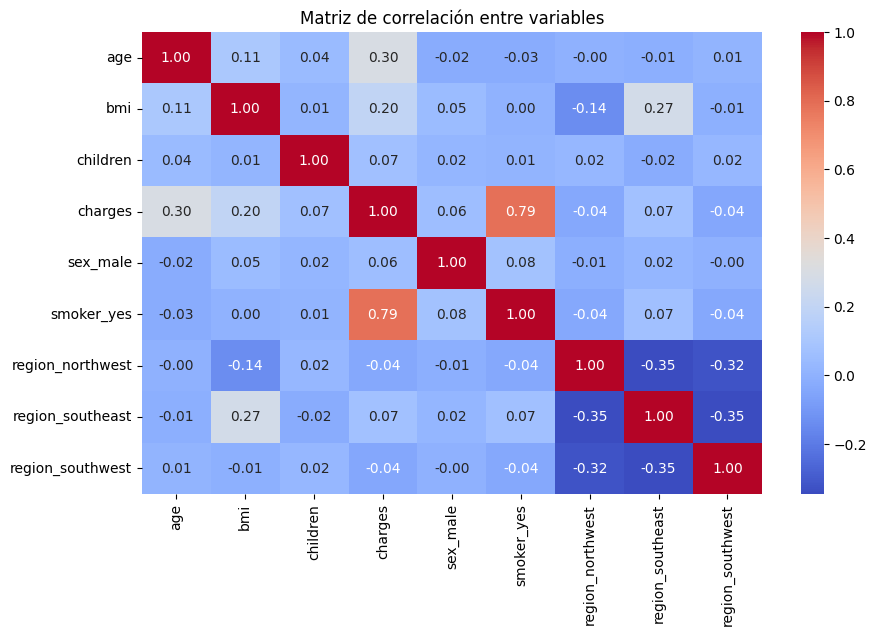

In [80]:
# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlación entre variables")
plt.show()


Aqui vemos que hay una alta coorelacion con los cargos si eres fumador. Fumar influye muchísimo en el coste del seguro. Es de las variables más correlacionadas.

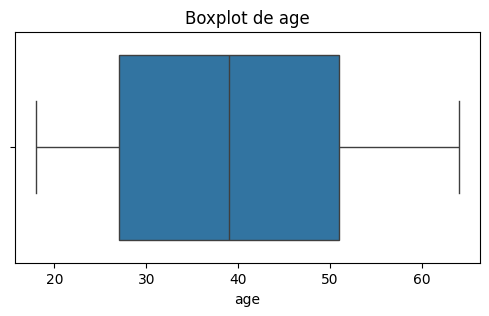

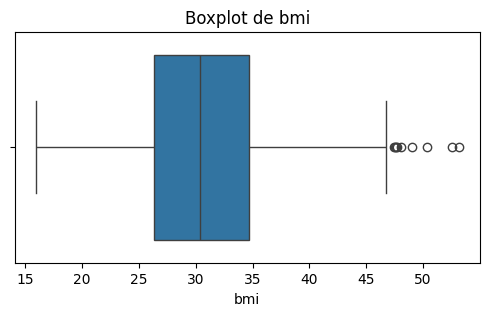

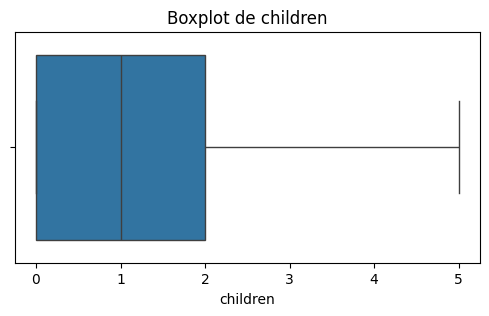

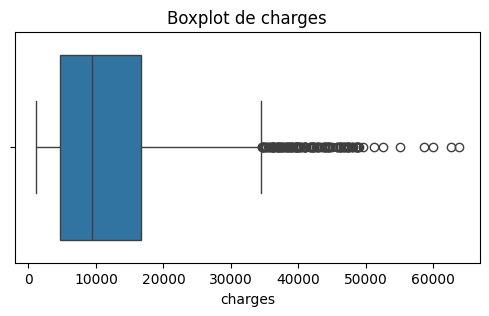

In [81]:
# Boxplots para detectar outliers
for col in ['age', 'bmi', 'children', 'charges']:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=dataframe[col])
    plt.title(f'Boxplot de {col}')
    plt.show()



Correlación de variables con 'charges':
charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


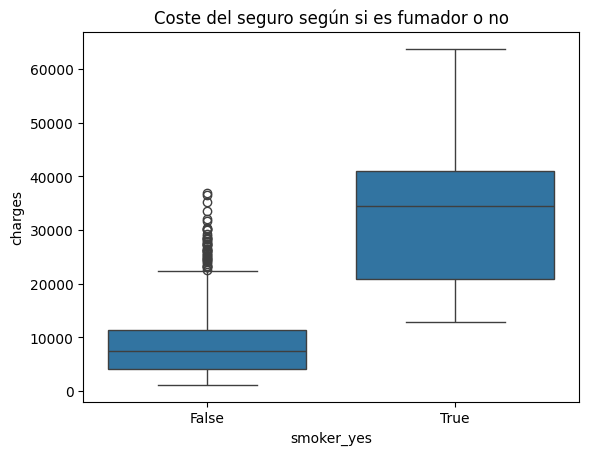

In [82]:
# Revisar correlación directa con la variable objetivo 'charges'
correlation = dataframe.corr()['charges'].sort_values(ascending=False)
print("Correlación de variables con 'charges':")
print(correlation)

sns.boxplot(data=dataframe, x='smoker_yes', y='charges')
plt.title("Coste del seguro según si es fumador o no")
plt.show()

##### Conclusión del Análisis Exploratorio de Datos (EDA)

Del análisis exploratorio realizado, se observa que las variables con mayor influencia en el coste del seguro (`charges`) son:

- **`smoker_yes`**: Tiene una relación fuertemente positiva con `charges`. Los fumadores pagan primas significativamente más altas.
- **`age`**: A medida que aumenta la edad, también lo hace el coste del seguro. Existe una correlación moderadamente fuerte.
- **`bmi`**: Especialmente en valores altos, podría estar asociada a mayores costes por condiciones relacionadas con la obesidad.

En contraste, variables como `children`, `sex_male` y las regiones (`region_*`) presentan baja correlación con la variable objetivo, por lo que podrían tener un impacto menor en el modelo.

En resumen, se recomienda mantener las variables `age`, `bmi` y `smoker_yes` como principales predictoras, y considerar la eliminación o evaluación más detallada del resto.

## Paso 3: Juntar todo el modelo de forma limpia 

In [83]:
# Dividir nuevamente por si filtramos columnas antes
X = dataframe.drop('charges', axis=1)
y = dataframe['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

MSE: 33596915.85
R² Score: 0.7836


## Paso 4: Optimizar el modelo

In [84]:
# Eliminar outliers extremos de 'charges' por encima del percentil 95

threshold = np.percentile(dataframe['charges'], 95)
dataframe_filtered = dataframe[dataframe['charges'] < threshold]

# Volver a separar datos
X = dataframe_filtered.drop('charges', axis=1)
y = dataframe_filtered['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Con outliers eliminados:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Modelo Ridge:")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_ridge):.4f}")

pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
pipeline.fit(X_train, y_train)
y_pred_scaled = pipeline.predict(X_test)

print("Modelo Ridge con escalado:")
print(f"MSE: {mean_squared_error(y_test, y_pred_scaled):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_scaled):.4f}")

Con outliers eliminados:
MSE: 27342530.84
R² Score: 0.7143
Modelo Ridge:
MSE: 27431033.77
R² Score: 0.7134
Modelo Ridge con escalado:
MSE: 27352187.53
R² Score: 0.7142
